In [1]:
import data
import urllib.request
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
ghn = data.GHNCD()
ghn.readCountriesFile()
ghn.readStationsFile()

Read 219 countries and codes
Read 991 stations with justGSN True


In [2]:
# Get list of station names
statNames= ghn.getStatKeyNames()
# Arbitrary number from 0 to 990
whichStat=220
fileName=statNames[whichStat]+'.dly'
urlName='http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/ghcnd/ghcnd_gsn/'+fileName
# Copy a network object to a local file
urllib.request.urlretrieve(urlName,fileName)
statDict=ghn.processFile(fileName)
print(ghn.getStation(statNames[whichStat]))

CA002400404 is ARCTIC BAY CS, Canada at 73.0, -85.0167, 10.0


In [3]:
def getFileName(stationNumber):
    fileName = statNames[stationNumber]+'.dly'
    urlName  ='http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/ghcnd/ghcnd_gsn/'+fileName

    # Copy a network object to a local file
    urllib.request.urlretrieve(urlName,fileName)
    statDict=ghn.processFile(fileName)
    return statDict

def extractStatDict(statDict=getFileName(220)):
    tMax = ghn.getVar(statDict,'TMAX')
    tMin = ghn.getVar(statDict,'TMAX')
    prcp = ghn.getVar(statDict,'PRCP')
    snow = ghn.getVar(statDict,'SNOW')
    snwd = ghn.getVar(statDict,'SNWD')
    return tMax, tMin, prcp, snow, snwd

def plotData(data, name="TMAX", units="(C)"):
    date, data_y = zip(*data)
    plt.figure()
    plt.plot(date, data_y,'.')
    plt.xlabel("date")
    plt.ylabel("{} ({})".format(name, units))
    return(np.shape(data))

In [4]:
tMax, tMin, prcp, snow, snwd = extractStatDict(getFileName(220))

In [5]:
import pandas as pd
df = pd.DataFrame(tMax, columns=['Date','tMax'])

In [6]:
def Dict(whichstat):
    statNames=ghn.getStatKeyNames()
    fileName=statNames[whichstat]+'.dly'
    urlName='http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/ghcnd/ghcnd_gsn/'+fileName

    # Copy a network object to a local file
    urllib.request.urlretrieve(urlName,fileName)
    statDict=ghn.processFile(fileName)
    return statDict

In [7]:
whichstat = 220
tmaxArray=ghn.getVar(Dict(whichstat),'TMAX')
days1, tmax = zip(*tmaxArray)
tminArray=ghn.getVar(Dict(whichstat),'TMIN')
days2, tmin = zip(*tminArray)

In [8]:
datesmax = days1
datesmin = days2

# create an empty numpy array to store the converted dates
converted_datesmax = np.empty(len(datesmax), dtype='datetime64[D]')
converted_datesmin = np.empty(len(datesmin), dtype='datetime64[D]')

# loop through the dates and convert each one
for i, datesmax in enumerate(datesmax):
    converted_datesmax[i] = np.datetime64(datesmax)
for i, datesmin in enumerate(datesmin):
    converted_datesmin[i] = np.datetime64(datesmin)
    
datesmax = np.array(converted_datesmax)
dates_strmax = np.datetime_as_string(datesmax)

datesmin = np.array(converted_datesmin)
dates_strmin = np.datetime_as_string(datesmin)

In [9]:
dfmax = pd.DataFrame({'temperature': tmax}, index=pd.to_datetime(dates_strmax))

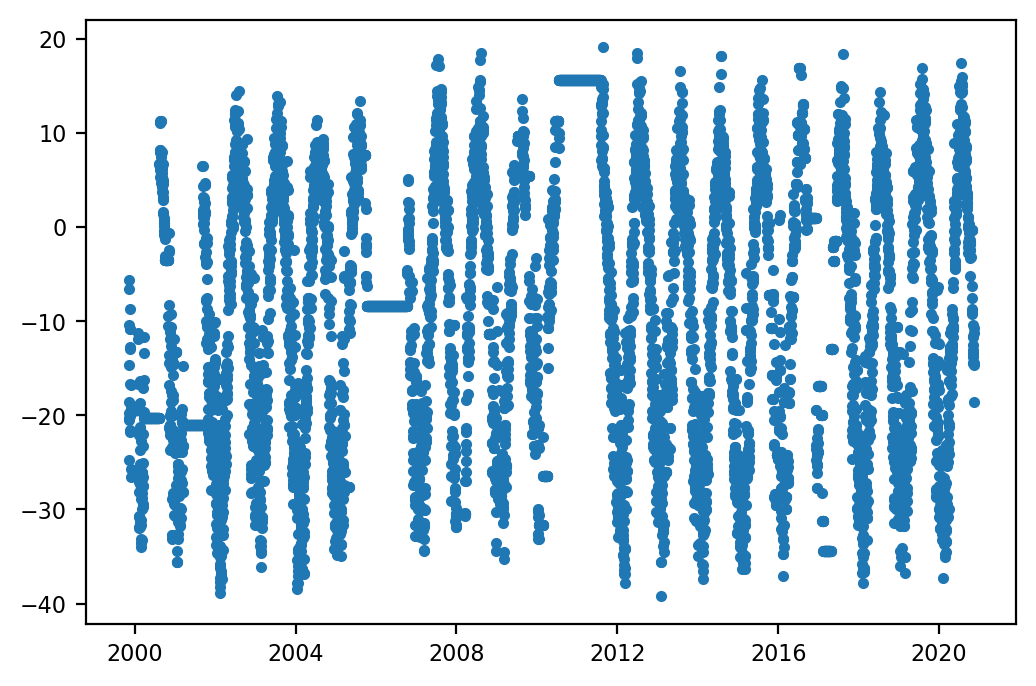

In [10]:
plt.plot(dfmax.resample('1D').mean().ffill(),'.',label='tMax')

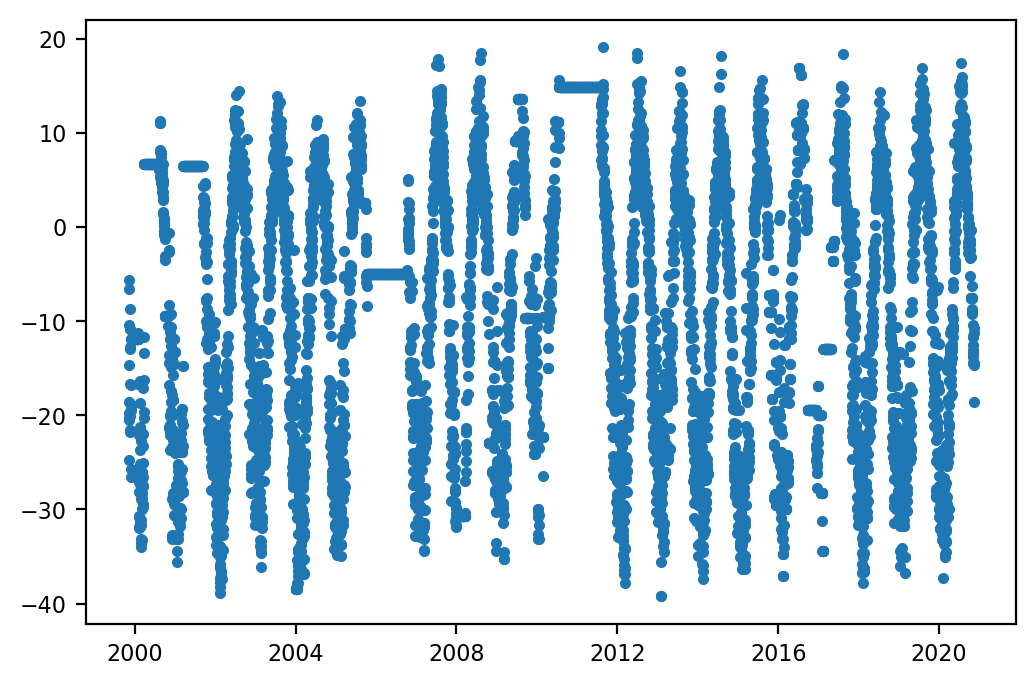

In [11]:
plt.plot(dfmax.resample('1D').mean().bfill(),'.',label='tMax')

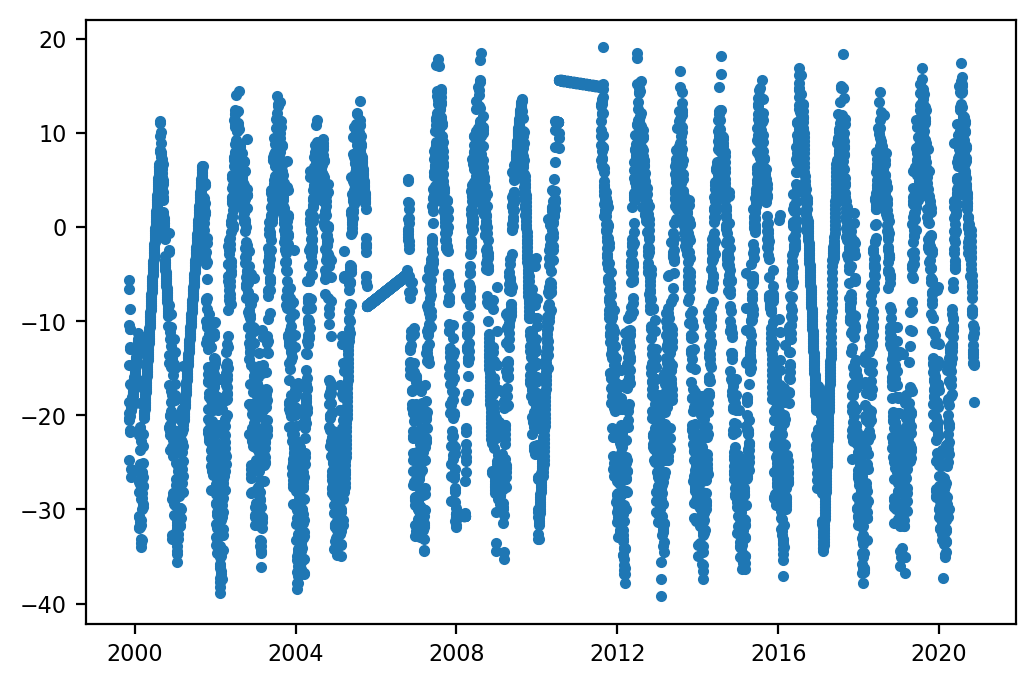

In [12]:
plt.plot(dfmax.resample('1D').mean().interpolate(),'.',label='tMax')